In [17]:
import torch
from torch.utils.data import DataLoader
from MLP import *
from CustomDataset import *

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Working on {device}')

Working on cuda


In [19]:
dset = CustomDataset('concrete.csv')
dset.normalize()
loader = DataLoader(dset, batch_size = 32, shuffle = True)

In [20]:
model = MLP(8, 10, 1).to(device)

In [21]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [22]:
loss_list = list()

In [23]:
for epoch in range(100):
    for index, (attributes, labels) in enumerate(loader):
        attributes = attributes.to(device)
        labels = labels.to(device)
        
        outputs = model(attributes)
        loss = criterion(outputs[:, 0], labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch {epoch+1}/100, Loss: {loss.item()}')
        loss_list.append(loss.item())

Epoch 1/100, Loss: 1.192557454109192
Epoch 1/100, Loss: 1.3448084592819214
Epoch 1/100, Loss: 0.6649332642555237
Epoch 1/100, Loss: 0.8518117666244507
Epoch 1/100, Loss: 0.9151186943054199
Epoch 1/100, Loss: 0.7162384986877441
Epoch 1/100, Loss: 0.7852343916893005
Epoch 1/100, Loss: 0.7339658141136169
Epoch 1/100, Loss: 1.1468709707260132
Epoch 1/100, Loss: 0.8362303972244263
Epoch 1/100, Loss: 0.691074788570404
Epoch 1/100, Loss: 0.5287002921104431
Epoch 1/100, Loss: 0.6672345399856567
Epoch 1/100, Loss: 0.8088927865028381
Epoch 1/100, Loss: 0.7833404541015625
Epoch 1/100, Loss: 0.5009783506393433
Epoch 1/100, Loss: 0.46630144119262695
Epoch 1/100, Loss: 0.4938403367996216
Epoch 1/100, Loss: 0.5607929229736328
Epoch 1/100, Loss: 0.6433477401733398
Epoch 1/100, Loss: 0.5482693314552307
Epoch 1/100, Loss: 0.48035258054733276
Epoch 1/100, Loss: 0.5675657391548157
Epoch 1/100, Loss: 0.4776621162891388
Epoch 1/100, Loss: 0.5627673268318176
Epoch 1/100, Loss: 0.5130518674850464
Epoch 1/100,

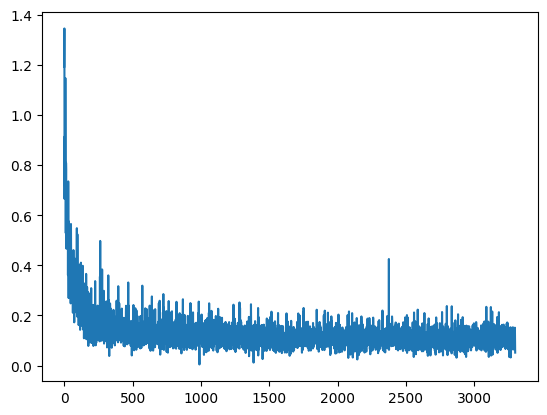

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_list)), loss_list)
plt.show()